統計学の勉強･復習

- 大数の法則
- 中心極限定理
- 検定
    - t検定
    - 2標本検定
    - 適合度検定

In [12]:
import numpy as np
from scipy.special import comb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

正しいコインを$n$回投げることを考える．$x_i\in\{0,1\}$(0が裏，1が表)．表が出た回数は$r = \sum_{i=1}^{N}$である．$r$は確率変数で$Bi(n, 0.5)$に従う．表が出た相対頻度の期待値は
$$
\mathbf{E}(r/n) = 0.5
$$
となり．真の確率`0.5`となる．

## 大数の法則

In [25]:
def binomial(n, x):
    """
    n : コインを投げる回数
    x : 表の出る回数
    """
    return comb(n, x) * 0.5 ** n

n回コインを投げて表がx回でる確率

In [26]:
df = pd.DataFrame({
    'proba': [binomial(10,i) for i in range(11)]
})
df['x_per_10'] = df.index / 10
df

,proba,x_per_10
0,0.000977,0.0
1,0.009766,0.1
2,0.043945,0.2
3,0.117188,0.3
4,0.205078,0.4
5,0.246094,0.5
6,0.205078,0.6
7,0.117188,0.7
8,0.043945,0.8
9,0.009766,0.9


5回周辺に集中しており，確率は

In [27]:
df.query(" 0.4 <= x_per_10 <= 0.6 ")['proba'].sum()

0.65625

コインを投げる回数を増やしていけば，`0.4 <= x/n <= 0.6`に収まる確率が`100%`に近づいていく(これが大数の法則)．n回投げればコインの表が出る相対頻度は0.5なんだから何回も投げれば0.5に収束するよねという話

In [28]:
def calc_proba(n):
    """
    n回コインを投げた場合の表が出る回数の相対頻度が0.4 ~ 0.6に収まる確率を計算してみる
    """
    df = pd.DataFrame({
        'proba': [binomial(n,i) for i in range(n+1)]
    })
    df['x_per_n'] = df.index / n
    return df.query(" 0.4 <= x_per_n <= 0.6 ")['proba'].sum()

In [32]:
for n in [10, 20, 30, 40, 50, 100, 1000]:
    print(f"n={n:03} : proba = {calc_proba(n)}")

n=010 : proba = 0.65625
n=020 : proba = 0.7368240356445312
n=030 : proba = 0.7995115779340267
n=040 : proba = 0.8461400558371679
n=050 : proba = 0.8810795474405637
n=100 : proba = 0.964799799782295
n=1000 : proba = 0.9999999998202969


実際に1に近づいていく様子が見れる

大数の法則を式で表現すると，
$$
P(|r/n - 0.5 | \le \epsilon) \rightarrow 1 \ \ \ (n \rightarrow \infty)
$$

## 中心極限定理

おおざっぱにいうと，母集団分布が何であっても$X_1,\cdots, X_n$の確率分布の形は，nが大なるときは，大略正規分布と考えてよい．

$$
S_n = X_1 + \cdots + X_n \sim \mathcal{N}(n\mu, n\sigma^2) \\
\bar{X} = (X_1 + \cdots + X_n) \ / \ n \sim \mathcal{N}(n\mu, n\sigma^2)
$$

ということ．

In [37]:
# サイコロをn回投げたときの和の平均
def dice_sum(n):
    return np.random.randint(1, 7) + np.random.randint(1, 7)

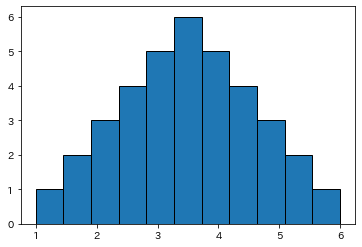

In [43]:
# n = 2
# 理論的には
lst = []
for i in range(1,7):
    for j in range(1,7):
        lst.append((i+j)/2)
    
plt.hist(lst, bins=11, ec='black')
plt.show()

In [44]:
# このときnをどんどん増やして行けば正規分布になる，というのが中心極限定理の内容

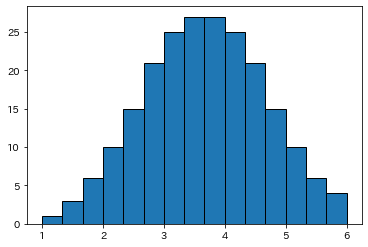

In [55]:
# n = 3
lst = []
for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            lst.append((i+j+k)/3)
    
plt.hist(lst, bins=15,ec='black')
plt.show()

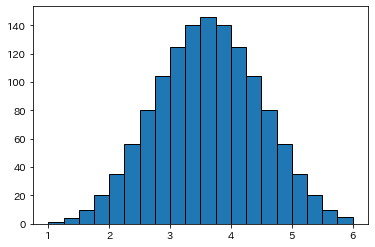

In [58]:
# n = 4
lst = []
for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            for l in range(1,7):
                lst.append((i+j+k+l)/4)
    
plt.hist(lst, bins=20,ec='black')
plt.show()

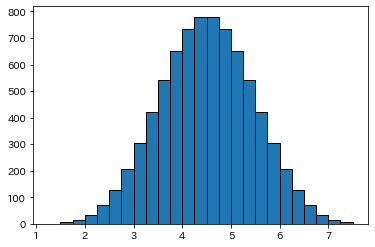

In [61]:
# n = 5
lst = []
for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            for l in range(1,7):
                for m in range(1,7):
                    lst.append((i+j+k+l+m)/4)
    
plt.hist(lst, bins=25,ec='black')
plt.show()

と，正規分布に近づいていくことが分かる

## 検定

### t検定

### 2標本平均 